<a href="https://colab.research.google.com/github/AndreRaz/YOLOV5m_ElectronicsComponents/blob/main/YOLOv5_Electronic_Components_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera implementación de arquitectura YOLO para la detección de componentes electrónicos

Se requiere instalar el paquete de Ultralytics para poder implementar la arquitectura YOLOv5

In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

Verificación de la GPU de Colab

In [ ]:
import torch
print(torch.cuda.get_device_name(0))

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

Montar Drive en Colab para acceder a los datos cargados en la nube

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Arquitectura utilizada para la prueba: YOLOv5mu

Los siguientes ajustes se realizaron siguiendo la documentación oficial de **Ultralytics**, así como los ejemplos proporcionados para cada parámetro de aumento de datos.

Se seleccionaron los siguientes parámetros para aplicar técnicas de aumento de datos:

* Cambio en el espacio de color (`hsv_h`)
* Saturación (`hsv_s`)
* Brillo (`hsv_v`)
* Perspectiva (`perspective`).
* Escalado (`scale`).

Para optimizar el entrenamiento del modelo:

* Se deshabilitó el almacenamiento en caché para evitar un uso excesivo de memoria RAM.  
* Se configuró el guardado de los pesos del modelo en cada una de las 100 épocas, permitiendo retomar el entrenamiento desde el último punto en caso de una interrupción.



In [ ]:
from ultralytics import YOLO

model = YOLO('yolov5mu.pt') # Cargar modelo YOLOv5 'medium'
results = model.train(data='/content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/data_ElectroCom61.yaml',
                      epochs=100,
                      cache=False,
                      hsv_s=0.7,
                      hsv_v=0.5,
                      hsv_h=0.2,
                      perspective=0.001,
                      scale=0.5,
                      project='/content/drive/MyDrive/Electronic Components Detection/runs/train',
                      name='electroCom_yolov5m',
                      save=True) # Ajuste de parámetros para el modelo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 48.2M/48.2M [00:00<00:00, 177MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/data_ElectroCom61.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.2, hsv_s=0.7, hsv_v=0.5, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5mu.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=electroCom_yolov5m8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ove

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]

Overriding model.yaml nc=80 with nc=61

                   from  n    params  module                                       arguments                     
  0                  -1  1      5280  ultralytics.nn.modules.conv.Conv             [3, 48, 6, 2, 2]              
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2     65280  ultralytics.nn.modules.block.C3              [96, 96, 2]                   
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    444672  ultralytics.nn.modules.block.C3              [192, 192, 4]                 
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  6   2512896  ultralytics.nn.modules.block.C3              [384, 384, 6]                 
  7                  -1  1   2655744  ultralytic

  9                  -1  1   1476864  ultralytics.nn.modules.block.SPPF            [768, 768, 5]                 
 10                  -1  1    295680  ultralytics.nn.modules.conv.Conv             [768, 384, 1, 1]              
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   1182720  ultralytics.nn.modules.block.C3              [768, 384, 2, False]          
 14                  -1  1     74112  ultralytics.nn.modules.conv.Conv             [384, 192, 1, 1]              
 15                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 16             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 17                  -1  2    296448  ultralytics.nn.modules.block.C3              [384,

100%|██████████| 5.35M/5.35M [00:00<00:00, 56.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.5±0.2 MB/s, size: 80.2 KB)


train: Scanning /content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/train/labels.cache... 1478 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1478/1478 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.4±0.2 MB/s, size: 72.9 KB)


val: Scanning /content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/valid/labels.cache... 438 images, 0 backgrounds, 0 corrupt: 100%|██████████| 438/438 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Electronic Components Detection/runs/train/electroCom_yolov5m8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000154, momentum=0.9) with parameter groups 91 weight(decay=0.0), 98 weight(decay=0.0005), 97 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Electronic Components Detection/runs/train/electroCom_yolov5m8
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.23G      1.713      3.629      1.598         66        640: 100%|██████████| 93/93 [03:46<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.79it/s]

                   all        438       2600      0.333      0.387       0.32      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.39G      1.446      2.102      1.395         44        640: 100%|██████████| 93/93 [00:49<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]

                   all        438       2600      0.556      0.597      0.618      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.47G      1.398      1.699      1.384         59        640: 100%|██████████| 93/93 [00:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        438       2600      0.631      0.701      0.729      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       6.6G      1.384      1.483      1.368         63        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]

                   all        438       2600      0.709      0.695      0.768      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.43G      1.353      1.361      1.357        101        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.13it/s]


                   all        438       2600      0.693      0.729      0.778      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       6.5G      1.336      1.278      1.358         92        640: 100%|██████████| 93/93 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]

                   all        438       2600      0.756      0.819      0.838      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.59G      1.302      1.209      1.329         70        640: 100%|██████████| 93/93 [00:56<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        438       2600      0.805      0.808      0.867       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.51G       1.28      1.145      1.324         79        640: 100%|██████████| 93/93 [00:55<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        438       2600      0.785        0.8      0.846      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.52G      1.288      1.126      1.321         60        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.92it/s]

                   all        438       2600      0.818      0.819      0.865      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.65G      1.272      1.073      1.319         63        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.21it/s]

                   all        438       2600      0.829      0.845       0.88      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.46G      1.258       1.04      1.306         65        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]

                   all        438       2600      0.837      0.851      0.888      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       6.5G      1.243      1.029      1.305         52        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        438       2600      0.838      0.842      0.889      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.54G       1.24     0.9948      1.305         61        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.16it/s]

                   all        438       2600      0.832      0.879      0.904      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       6.5G      1.228     0.9543      1.289         51        640: 100%|██████████| 93/93 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.22it/s]

                   all        438       2600      0.817      0.865      0.894      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.46G      1.214     0.9623      1.288         56        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]

                   all        438       2600      0.816      0.871      0.887      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.43G      1.209     0.9448       1.28         57        640: 100%|██████████| 93/93 [00:58<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.19it/s]

                   all        438       2600      0.863      0.857      0.901       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.54G      1.207     0.9311      1.287         43        640: 100%|██████████| 93/93 [00:53<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        438       2600      0.833      0.876      0.905      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.5G      1.198     0.9041      1.279         54        640: 100%|██████████| 93/93 [00:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        438       2600      0.852      0.891      0.912      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.47G      1.189     0.9126      1.285         87        640: 100%|██████████| 93/93 [00:53<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.11it/s]

                   all        438       2600      0.865      0.883      0.913      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.47G      1.195     0.8847      1.278         46        640: 100%|██████████| 93/93 [00:53<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        438       2600      0.865      0.894      0.924      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.51G      1.174     0.8868      1.276         78        640: 100%|██████████| 93/93 [00:56<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]

                   all        438       2600      0.869       0.88      0.924      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.48G      1.168     0.8715      1.265         61        640: 100%|██████████| 93/93 [00:55<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]

                   all        438       2600      0.858      0.882      0.912      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.52G      1.175     0.8558      1.275         85        640: 100%|██████████| 93/93 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        438       2600      0.854      0.881       0.92      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.47G      1.167     0.8471      1.259         68        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]

                   all        438       2600      0.878      0.886      0.923      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.39G      1.173     0.8558      1.264         77        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        438       2600      0.871      0.884      0.925      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.48G      1.145     0.8237       1.25         75        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.20it/s]

                   all        438       2600      0.884      0.895      0.932      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.49G      1.139     0.8192      1.253         51        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.01it/s]

                   all        438       2600        0.9       0.89      0.931      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.51G      1.142     0.8165      1.251         60        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.91it/s]

                   all        438       2600       0.86      0.925      0.911       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.54G       1.13     0.8128       1.25         47        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        438       2600      0.881      0.886      0.926      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       6.5G       1.13     0.7911      1.239         40        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        438       2600       0.87      0.898      0.916       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.37G      1.115     0.7839      1.236         59        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        438       2600       0.86      0.899      0.921      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.45G      1.111     0.7668      1.241         48        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        438       2600      0.885      0.892      0.912      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.38G      1.129     0.7814      1.252         67        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.10it/s]

                   all        438       2600      0.876      0.894      0.917      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.47G      1.111     0.7653      1.227         77        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]

                   all        438       2600      0.888      0.903      0.926        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.49G      1.119     0.7755      1.241         42        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        438       2600      0.893      0.899      0.929      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.48G       1.11     0.7549      1.234         47        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        438       2600      0.872      0.904      0.924      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.54G      1.093     0.7338      1.224         47        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]

                   all        438       2600      0.894      0.909      0.929      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.45G      1.095     0.7449       1.22         84        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        438       2600      0.885      0.884      0.917      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.46G      1.093     0.7324       1.22         37        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]

                   all        438       2600      0.886      0.899      0.938      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.49G      1.092     0.7326      1.213         72        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.04it/s]

                   all        438       2600      0.899      0.897      0.924      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.54G      1.079     0.7111      1.211         60        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        438       2600      0.879      0.907      0.926      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.52G      1.077     0.7174      1.216         69        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.02it/s]

                   all        438       2600      0.886      0.907      0.922      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.43G      1.072      0.717      1.215         73        640: 100%|██████████| 93/93 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.18it/s]

                   all        438       2600      0.895      0.924      0.936      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.62G      1.058     0.6835      1.197         81        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        438       2600      0.891      0.911      0.938      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.54G      1.071     0.6948       1.21         54        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]

                   all        438       2600      0.897      0.916      0.932      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.51G       1.06     0.6915      1.197         49        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        438       2600      0.893      0.908      0.925      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.62G      1.056     0.6819      1.189         50        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.07it/s]

                   all        438       2600      0.918      0.929      0.947      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.45G      1.044     0.6735      1.195         66        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.95it/s]

                   all        438       2600        0.9      0.918      0.928      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.52G       1.05      0.674      1.197         40        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        438       2600      0.901      0.919      0.933      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.61G       1.04     0.6808      1.185         64        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.15it/s]

                   all        438       2600      0.899      0.895       0.93      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.43G      1.042     0.6702      1.191         74        640: 100%|██████████| 93/93 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        438       2600      0.911      0.901      0.925       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.63G       1.03     0.6704      1.189         38        640: 100%|██████████| 93/93 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        438       2600      0.902      0.895      0.922      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.42G      1.028     0.6667      1.182         55        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        438       2600       0.87      0.924      0.922      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.66G      1.036     0.6446      1.179         57        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.22it/s]

                   all        438       2600      0.905      0.911      0.932        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.52G      1.028      0.652      1.183         59        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        438       2600      0.907       0.92      0.936        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.47G      1.022     0.6454      1.178         69        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]

                   all        438       2600      0.914      0.893      0.935      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.51G      1.007     0.6221       1.17         76        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

                   all        438       2600      0.907      0.917      0.934      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.46G       1.01     0.6249      1.182         67        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        438       2600      0.905      0.916      0.935      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.46G      1.009     0.6348      1.173         84        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        438       2600      0.901      0.911      0.916      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       6.6G      1.002     0.6284      1.167         87        640: 100%|██████████| 93/93 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        438       2600      0.902      0.918      0.932      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.54G     0.9994     0.6311      1.165         67        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.09it/s]

                   all        438       2600      0.903      0.917      0.932      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       6.5G     0.9937     0.6257       1.16         50        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.94it/s]

                   all        438       2600      0.894      0.909      0.919      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.43G      0.995      0.612      1.164         63        640: 100%|██████████| 93/93 [00:50<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.99it/s]

                   all        438       2600      0.906      0.926      0.935      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.45G     0.9806     0.5979      1.152         85        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        438       2600      0.902      0.914      0.925      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.54G     0.9919     0.6146      1.167         59        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.25it/s]

                   all        438       2600      0.905      0.923      0.928      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.49G     0.9726     0.5997      1.158         39        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        438       2600      0.904       0.94      0.943      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.59G     0.9819     0.6044      1.151         54        640: 100%|██████████| 93/93 [00:51<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.19it/s]

                   all        438       2600      0.905      0.904      0.931      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.61G     0.9733     0.5962      1.148         80        640: 100%|██████████| 93/93 [00:53<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]

                   all        438       2600      0.897      0.916      0.935        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.54G     0.9787     0.5946      1.147         63        640: 100%|██████████| 93/93 [00:53<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.87it/s]

                   all        438       2600      0.904      0.919      0.932      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.48G     0.9537     0.5803      1.137         76        640: 100%|██████████| 93/93 [00:53<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.14it/s]

                   all        438       2600      0.902      0.919      0.931      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.61G     0.9582     0.5817      1.142         81        640: 100%|██████████| 93/93 [00:52<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        438       2600      0.902      0.929      0.935      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.61G     0.9619     0.5867      1.142         40        640: 100%|██████████| 93/93 [00:52<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        438       2600      0.923      0.931      0.944      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.38G     0.9594     0.5795      1.143         74        640: 100%|██████████| 93/93 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.93it/s]

                   all        438       2600      0.922      0.925      0.939      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.48G     0.9468     0.5763       1.14         58        640: 100%|██████████| 93/93 [00:51<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        438       2600      0.919       0.92       0.94      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.46G     0.9535     0.5717      1.137         80        640: 100%|██████████| 93/93 [00:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.99it/s]

                   all        438       2600      0.917      0.924      0.937      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.61G     0.9473      0.578      1.139         63        640: 100%|██████████| 93/93 [00:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        438       2600      0.916      0.926      0.941      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.44G     0.9447     0.5729      1.139         71        640: 100%|██████████| 93/93 [00:54<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        438       2600      0.912      0.921      0.933      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.47G      0.943     0.5711      1.137         52        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.86it/s]

                   all        438       2600      0.911      0.926      0.935      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.47G     0.9432     0.5711      1.131         66        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.05it/s]

                   all        438       2600      0.923      0.921      0.937      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.63G     0.9395     0.5638      1.127         58        640: 100%|██████████| 93/93 [00:55<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.08it/s]

                   all        438       2600      0.917       0.93      0.939      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.53G     0.9295     0.5624      1.118         65        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        438       2600      0.917      0.924      0.935      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.49G     0.9346     0.5595       1.12         56        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.96it/s]

                   all        438       2600       0.91      0.916      0.931      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.45G     0.9129     0.5498      1.117         87        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.12it/s]

                   all        438       2600      0.912      0.933      0.934      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.46G     0.9222     0.5553      1.117         58        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        438       2600       0.92       0.93       0.94      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.52G      0.912     0.5469      1.118         56        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]

                   all        438       2600      0.931      0.925      0.945       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.45G     0.9179     0.5413      1.116         67        640: 100%|██████████| 93/93 [00:55<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.98it/s]

                   all        438       2600      0.925      0.933      0.945      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.46G     0.9155       0.54      1.116         47        640: 100%|██████████| 93/93 [00:55<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]

                   all        438       2600      0.925      0.924      0.938      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       6.5G     0.9099     0.5484      1.114         67        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]

                   all        438       2600      0.924      0.919      0.941      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.51G     0.9027      0.529      1.112         77        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        438       2600      0.927      0.927      0.938      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.49G     0.9017     0.5385      1.115         60        640: 100%|██████████| 93/93 [00:51<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.06it/s]

                   all        438       2600      0.928      0.935      0.943      0.618


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.42G     0.7747     0.3663      1.069         43        640: 100%|██████████| 93/93 [00:51<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:07<00:00,  1.89it/s]

                   all        438       2600      0.908      0.933      0.941      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.44G     0.7656     0.3509      1.058         37        640: 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.03it/s]

                   all        438       2600      0.919      0.928      0.938      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       6.5G     0.7547     0.3481      1.053         38        640: 100%|██████████| 93/93 [00:50<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        438       2600      0.912       0.93      0.942      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.43G     0.7481      0.345       1.05         34        640: 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.23it/s]

                   all        438       2600      0.916      0.926      0.937      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.42G     0.7394      0.342      1.046         34        640: 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.24it/s]

                   all        438       2600      0.905      0.939       0.94      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.42G      0.747     0.3421      1.045         30        640: 100%|██████████| 93/93 [00:50<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]

                   all        438       2600      0.913      0.936      0.943      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.34G     0.7325      0.338       1.04         34        640: 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        438       2600      0.913      0.938      0.941      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.47G     0.7365     0.3395      1.041         41        640: 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]

                   all        438       2600       0.91      0.937       0.94      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       6.6G     0.7269     0.3333      1.035         44        640: 100%|██████████| 93/93 [00:50<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]

                   all        438       2600      0.913      0.935      0.941      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       6.6G     0.7355     0.3417      1.041         42        640: 100%|██████████| 93/93 [00:50<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]

                   all        438       2600      0.913      0.934      0.941      0.617



100 epochs completed in 1.724 hours.
Optimizer stripped from /content/drive/MyDrive/Electronic Components Detection/runs/train/electroCom_yolov5m8/weights/last.pt, 50.6MB
Optimizer stripped from /content/drive/MyDrive/Electronic Components Detection/runs/train/electroCom_yolov5m8/weights/best.pt, 50.6MB

Validating /content/drive/MyDrive/Electronic Components Detection/runs/train/electroCom_yolov5m8/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5m summary (fused): 106 layers, 25,080,535 parameters, 0 gradients, 64.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11<00:00,  1.27it/s]


                   all        438       2600      0.925      0.933      0.945      0.622
      1-5-Volt-Battery        103        109      0.983      0.982       0.98      0.675
      3-3-Volt-Battery         38         38       0.94      0.947      0.926      0.654
     7-Segment-Display         36         36      0.911      0.944       0.99      0.684
          Arduino-Mega         29         29          1      0.979      0.995      0.877
          Arduino-Nano        104        105      0.971      0.946      0.982      0.693
           Arduino-Uno          5          5       0.89          1      0.995      0.837
        BJT-Transistor        100        100      0.886      0.855       0.88      0.339
            Breadboard         31         31      0.989          1      0.995      0.844
      Bridge-Rectifier         45         45      0.991          1      0.995      0.805
        Buck-Converter         33         33      0.996          1      0.995      0.776
        Capacitor-10m

Adicionalmente al aumento de datos definido en el `model`, se aplicaron técnicas de aumento de datos utilizando la librería **Albumentations**. Los métodos utilizados son:

* `Blur` y `MedianBlur`: desenfoque.
* `ToGray`: convierte imágenes a escala de grises.
* `CLAHE`: ecualización adaptativa de histograma, aumenta el contraste y mejora visibilidad en condiciones difíciles.


# Optimizador:

Se utilizó un ajuste automático para el optimizador según la configuración del modelo `optimizer=auto`, así como la tasa de aprendizaje `lr`

El sistema eligió el optimizador **AdamW** con los siguientes parámetros:

* `lr` = 0.000154  
* `momentum` = 0.9  
* `weight_decay` por tipo de parámetro

Una vez entrenada la arquitectura durante 100 épocas, se guarda el mejor ajuste de pesos. Este se carga para realizar las predicciones de la carpeta `/test`

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Electronic Components Detection/runs/train/electroCom_yolov5m8/weights/best.pt') # Cargar el mejor modelo

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
predictions = model.predict(source='/content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/test/images',
                            save=True,
                            project='/content/drive/MyDrive/Electronic Components Detection/runs',
                            name='detect/predict')


image 1/205 /content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/test/images/IMG20240228125654_jpg.rf.9e9dbf556d80e21645e808b3edd44214.jpg: 640x640 1 BJT-Transistor, 1 Capacitor-10mf, 2 Capacitor-470mfs, 1 IR-Sensor, 1 MOSFET, 1 Pin-Header, 1 Soil-Moisture-Sensor, 1 Tact-Switch, 1 Zener-Diode, 1419.6ms
image 2/205 /content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/test/images/IMG20240228125738_jpg.rf.e8861dac8b270929cd9704293911e417.jpg: 640x640 1 BJT-Transistor, 1 Capacitor-10mf, 1 Capacitor-470mf, 1 IGBT, 1 IR-Sensor, 1 MOSFET, 1 Pin-Header, 1 Soil-Moisture-Sensor, 1 Tact-Switch, 1 Zener-Diode, 1350.4ms
image 3/205 /content/drive/MyDrive/Electronic Components Detection/ElectroCom-61_v2/test/images/IMG20240228125746_jpg.rf.73a2659d246f5eeeb3d2bc61f59d98d0.jpg: 640x640 1 BJT-Transistor, 1 Capacitor-10mf, 1 Capacitor-470mf, 1 IGBT, 1 IR-Sensor, 1 MOSFET, 1 Pin-Header, 1 Soil-Moisture-Sensor, 1 Tact-Switch, 1 Zener-Diode, 1579.6ms
image 4/205 /con

Se desplegaron las primeras 5 imágenes de prueba, mostrando sus respectivas *bounding boxes*, el **nombre de la clase** correspondiente y la **probabilidad** asociada a cada predicción.



image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/predict/IMG20240228125654_jpg.rf.9e9dbf556d80e21645e808b3edd44214.jpg: 640x640 1 BJT-Transistor, 1 Buck-Converter, 1 Capacitor-10mf, 2 Capacitor-470mfs, 1 Motor-Driver, 1 Soil-Moisture-Sensor, 1 Zener-Diode, 1306.0ms
Speed: 3.1ms preprocess, 1306.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


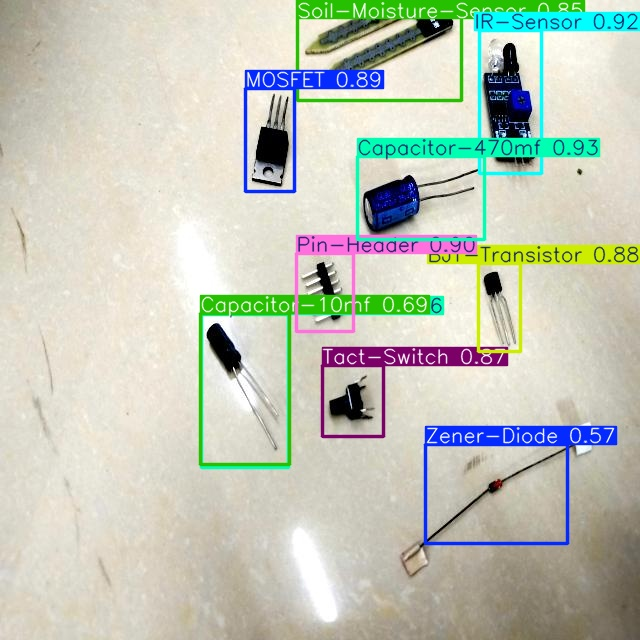




image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/predict/IMG20240228125738_jpg.rf.e8861dac8b270929cd9704293911e417.jpg: 640x640 1 BJT-Transistor, 1 MOSFET, 1 Pin-Header, 1 Soil-Moisture-Sensor, 1628.5ms
Speed: 3.9ms preprocess, 1628.5ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


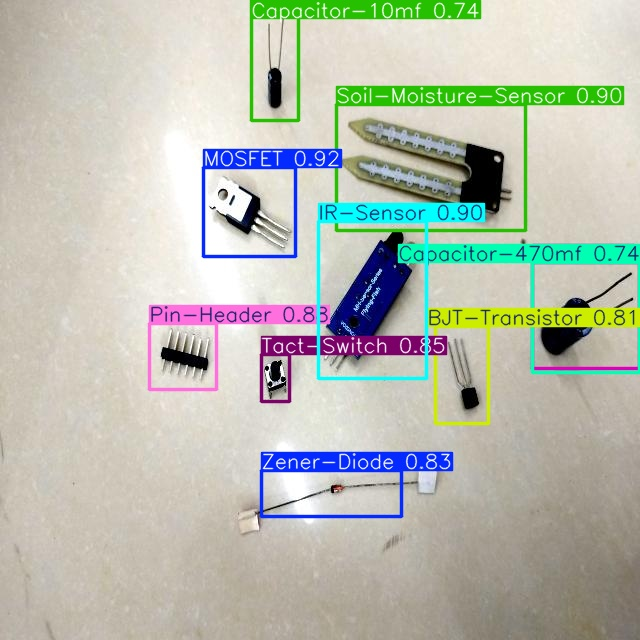




image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/predict/IMG20240228125746_jpg.rf.73a2659d246f5eeeb3d2bc61f59d98d0.jpg: 640x640 1 Capacitor-470mf, 1 IR-Sensor, 2382.3ms
Speed: 6.0ms preprocess, 2382.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


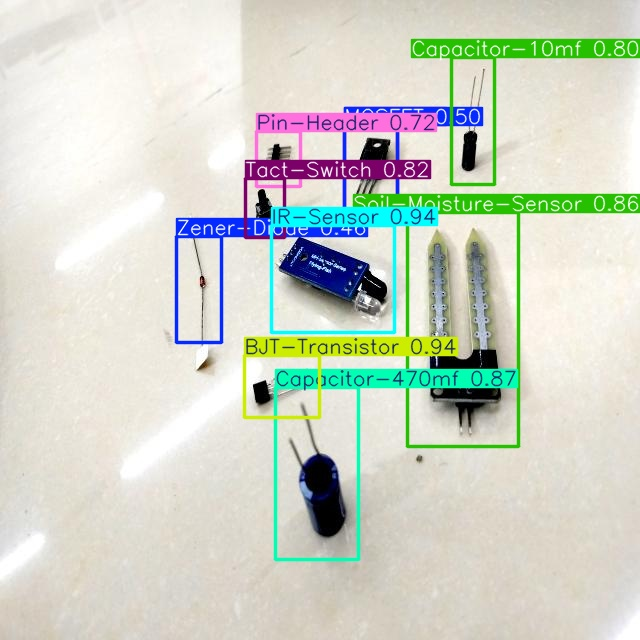




image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/predict/IMG20240228125809_jpg.rf.3c8ec50c6d1439eb93c62aa19ce6bb59.jpg: 640x640 1 1-5-Volt-Battery, 1 BJT-Transistor, 2 Capacitor-470mfs, 1 MOSFET, 1 Pin-Header, 1 Soil-Moisture-Sensor, 1 Zener-Diode, 1917.5ms
Speed: 3.9ms preprocess, 1917.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


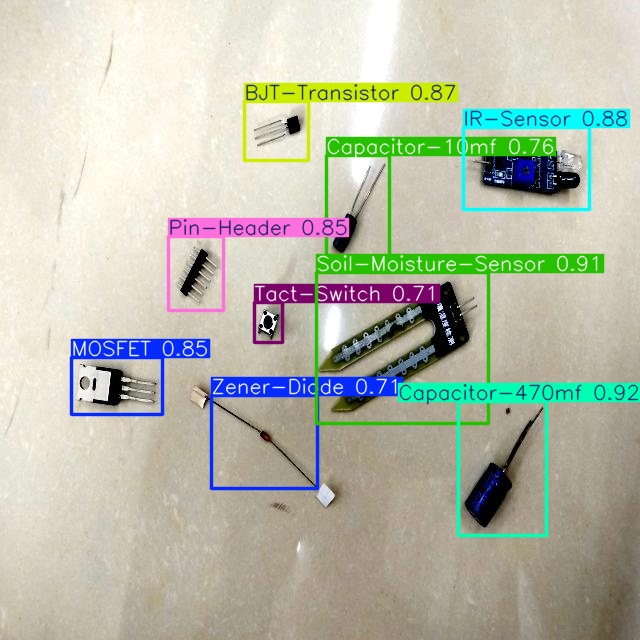




image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/predict/IMG20240228130041_jpg.rf.ed2d1e1ef1039f3194e320c3645a848d.jpg: 640x640 1 BJT-Transistor, 1 Capacitor-470mf, 1 IC-Chip, 2 IR-Sensors, 1 MOSFET, 1 Soil-Moisture-Sensor, 1 TCRT5000, 1307.1ms
Speed: 4.3ms preprocess, 1307.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


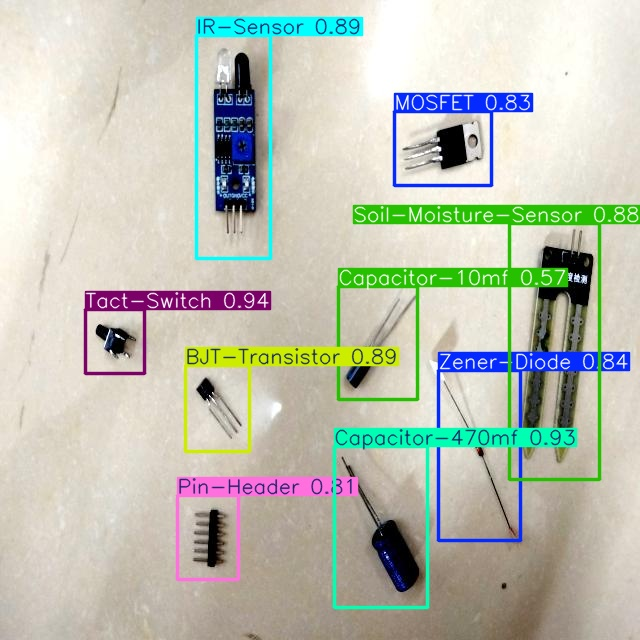

In [ ]:
import glob
from IPython.display import Image, display

test_images_path = glob.glob('/content/drive/MyDrive/Electronic Components Detection/runs/detect/predict/*.jpg')[:5]

for img in test_images_path:
  pred = model(img)
  display(Image(filename=img))
  print("\n")

Probando el modelo con imágenes ajenas al dataset ElectroCom61

In [ ]:
predictions = model.predict(source='/content/drive/MyDrive/Electronic Components Detection/img_pruebas',
                            save=True,
                            project='/content/drive/MyDrive/Electronic Components Detection/runs',
                            name='detect/otras_pruebas')


image 1/3 /content/drive/MyDrive/Electronic Components Detection/img_pruebas/prueba1.jpg: 384x640 1 ESP32-CAM, 1 Servo-Motor, 58.8ms
image 2/3 /content/drive/MyDrive/Electronic Components Detection/img_pruebas/prueba2.jpg: 384x640 3 7-Segment-Displays, 1 Breadboard, 24.1ms
image 3/3 /content/drive/MyDrive/Electronic Components Detection/img_pruebas/prueba3.jpg: 384x640 6 IC-Chips, 24.1ms
Speed: 6.5ms preprocess, 35.6ms inference, 121.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/drive/MyDrive/Electronic Components Detection/runs/detect/otras_pruebas



image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/otras_pruebas/prueba1.jpg: 384x640 2 Buck-Converters, 1 ESP32-CAM, 1 TCRT5000, 24.1ms
Speed: 3.6ms preprocess, 24.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


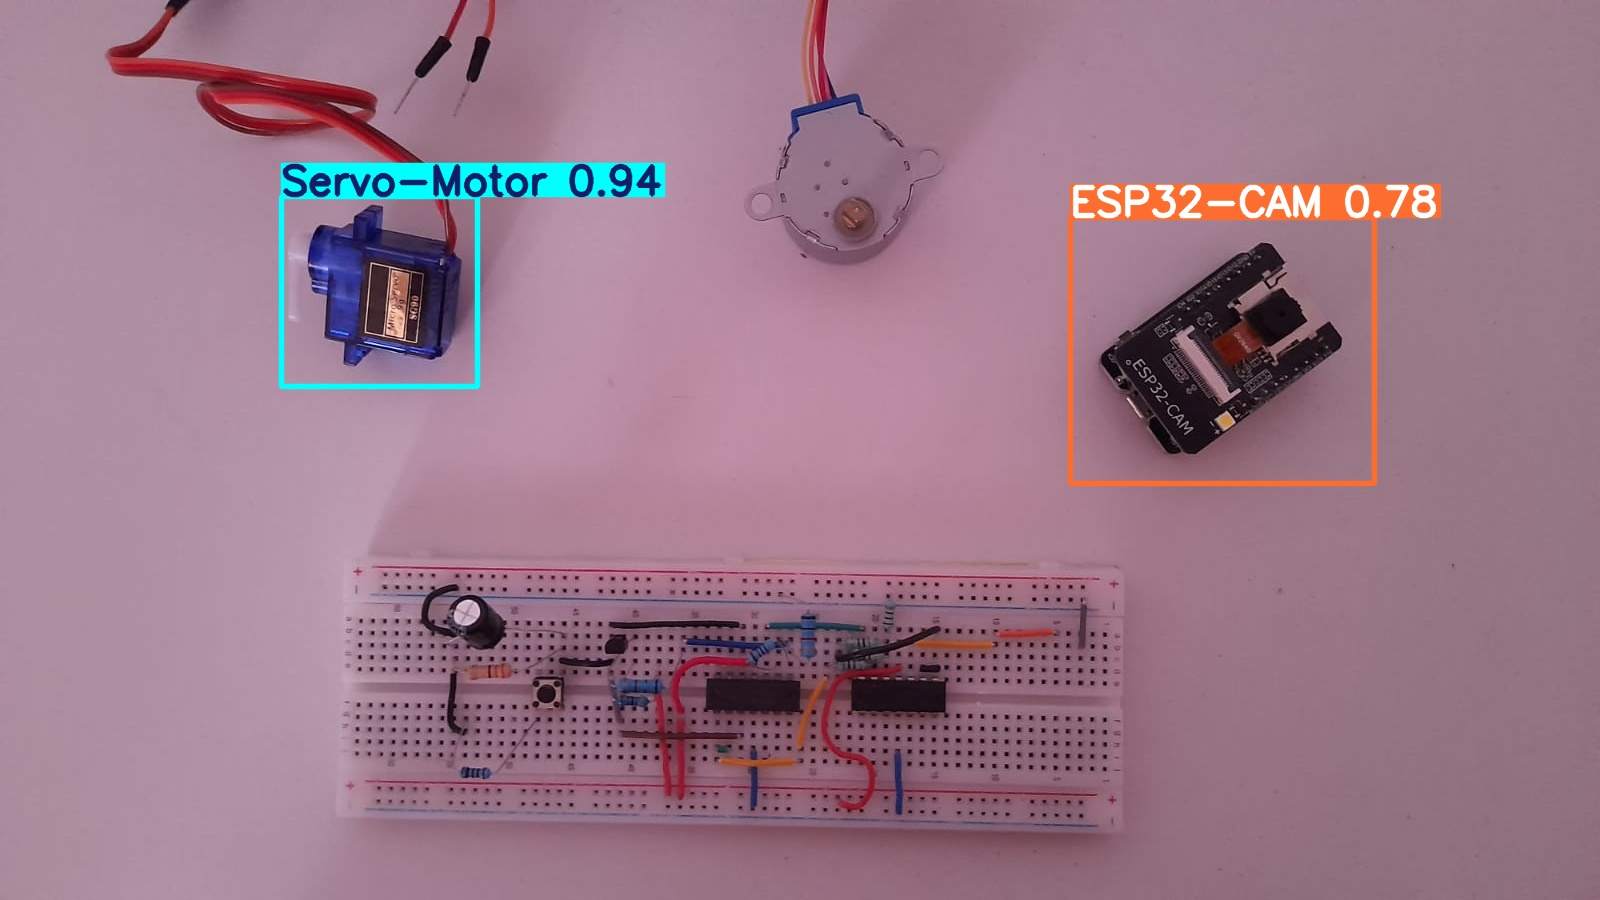




image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/otras_pruebas/prueba2.jpg: 384x640 3 7-Segment-Displays, 1 Breadboard, 26.7ms
Speed: 3.4ms preprocess, 26.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


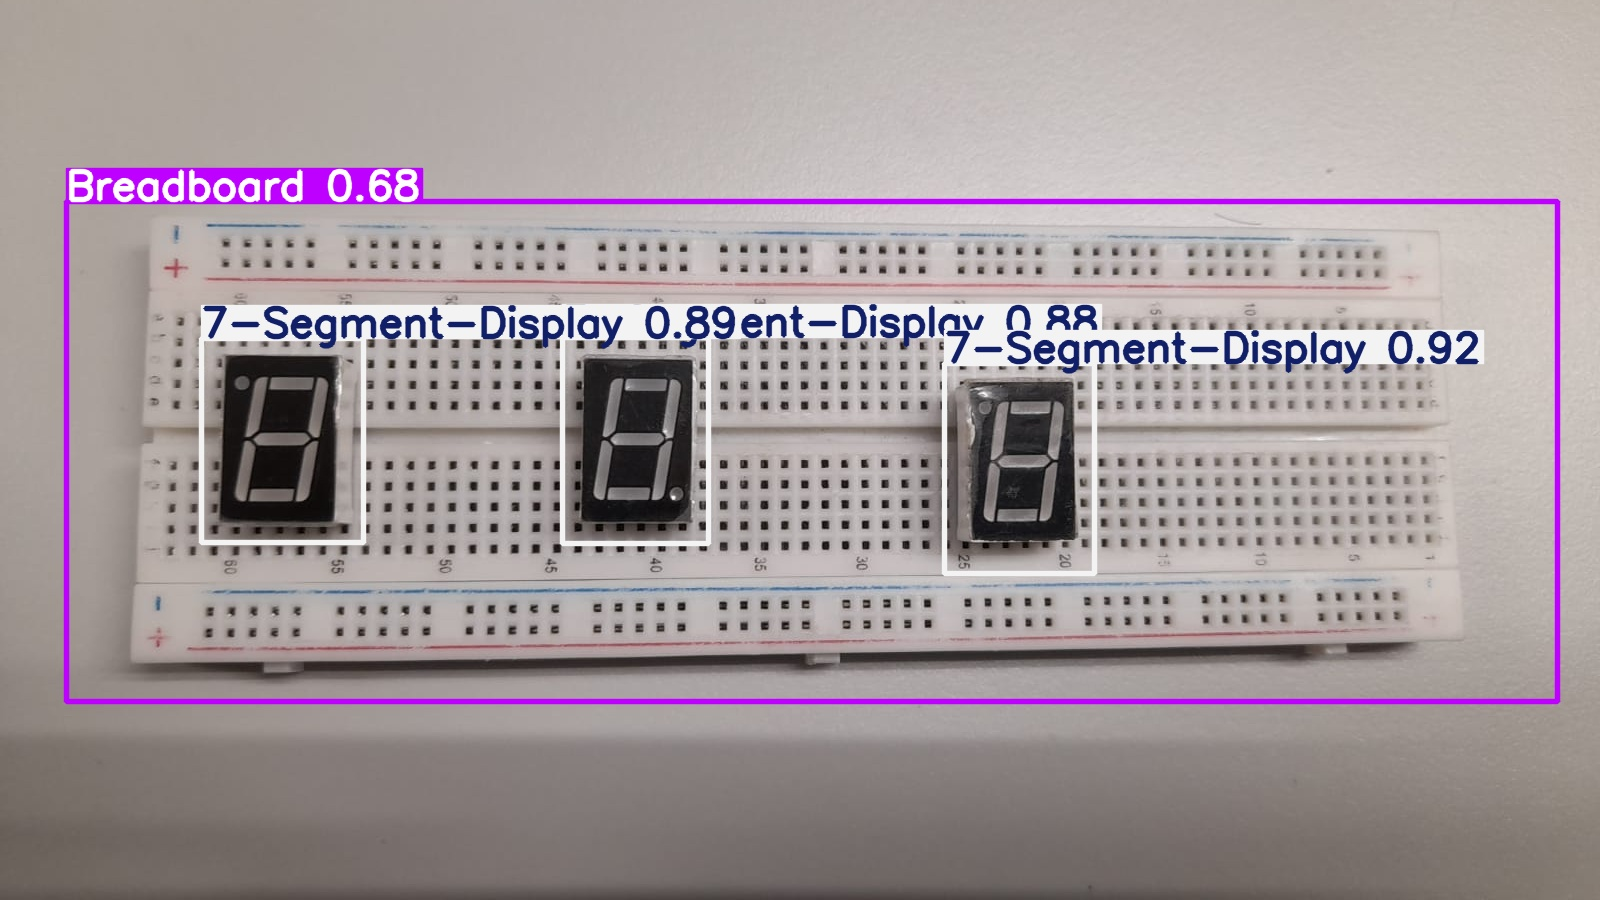




image 1/1 /content/drive/MyDrive/Electronic Components Detection/runs/detect/otras_pruebas/prueba3.jpg: 384x640 3 IR-Sensors, 2 LCD-Displays, 1 Motor-Driver, 39.0ms
Speed: 6.0ms preprocess, 39.0ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)


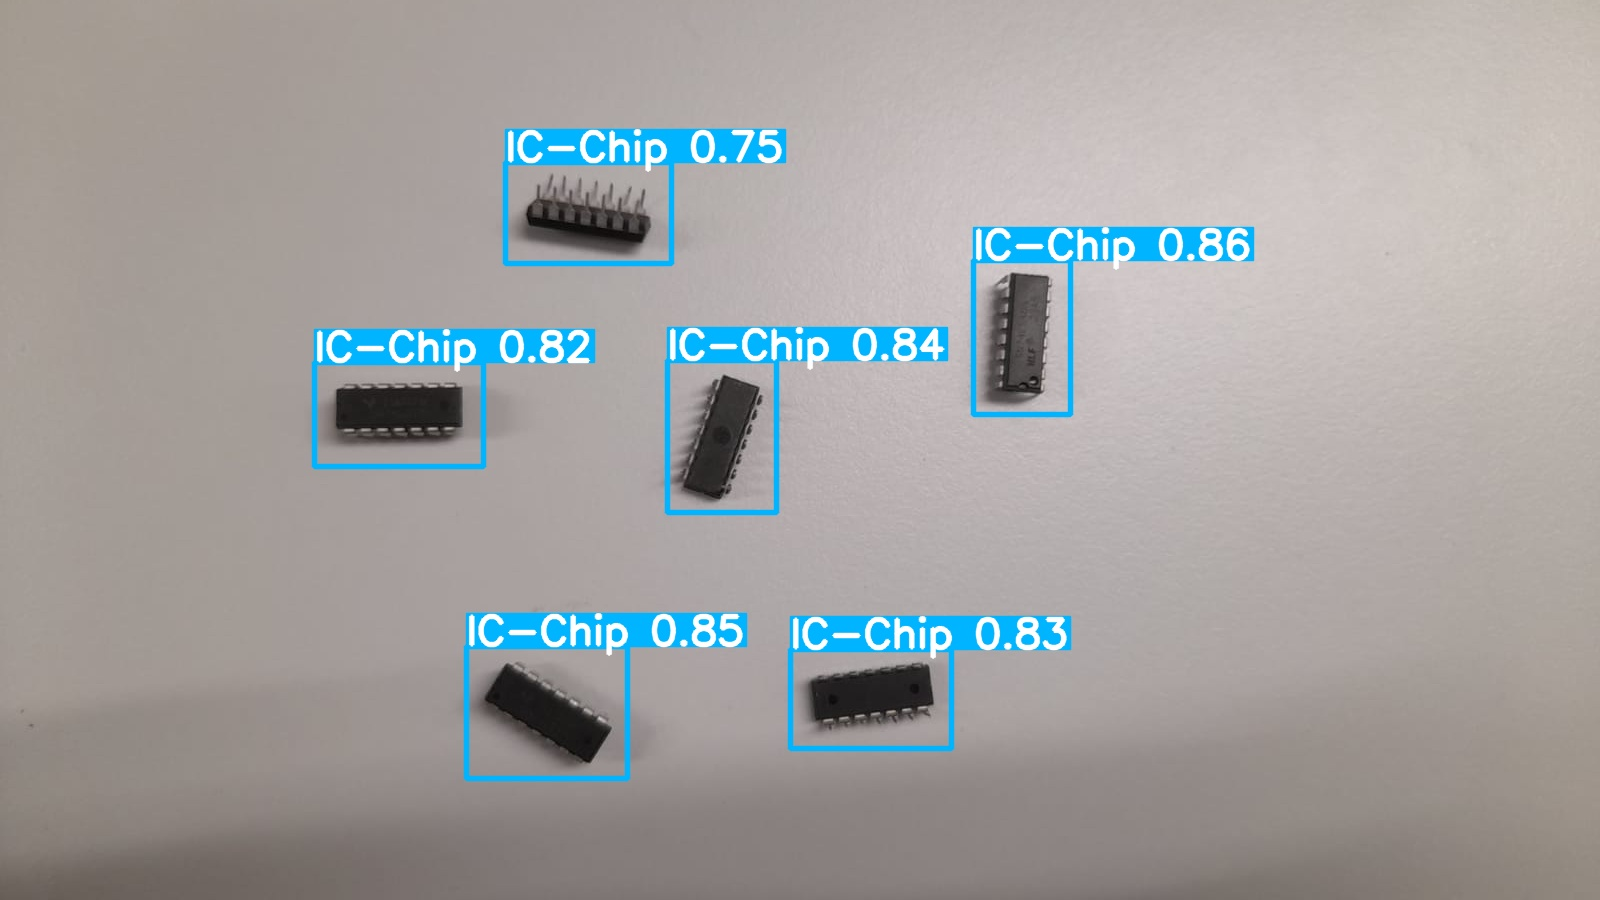

In [ ]:
import glob
from IPython.display import Image, display

test_images_path = glob.glob('/content/drive/MyDrive/Electronic Components Detection/runs/detect/otras_pruebas/*.jpg')

for img in test_images_path:
  pred = model(img)
  display(Image(filename=img, height=400))
  print("\n")

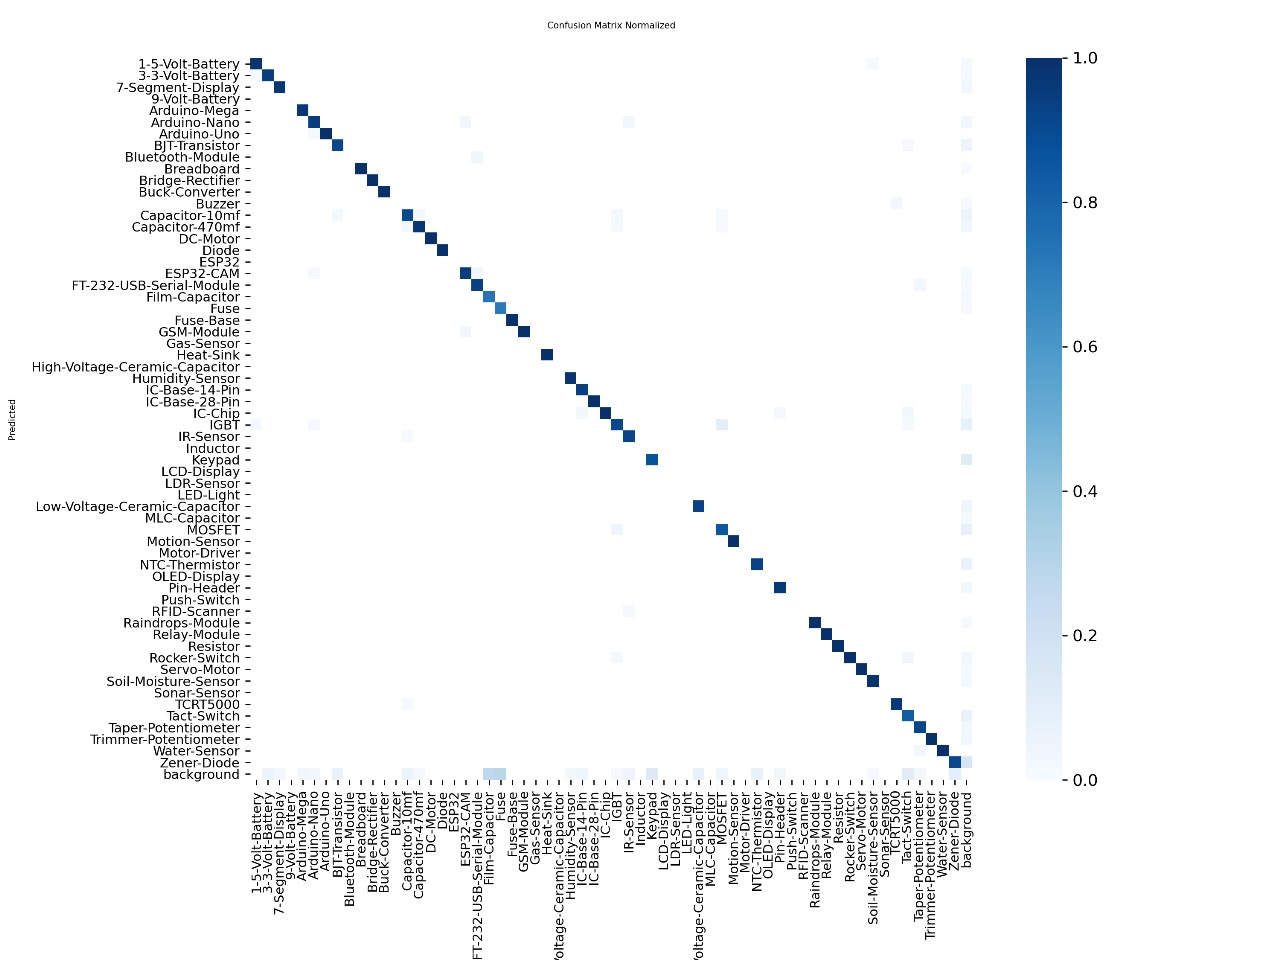

In [1]:
from IPython.display import Image
Image("/content/mc.37.05.jpeg")


# Matriz de confusión
Esta imagen nos muestra el desempeño del modelo al clasificar objetos en distintas clases, el eje vertical contiene las etiquetas de las clases y el eje horizontal contiene las predicciones del modelo.


En la diagonal principal tendremos las predicciones correctas, mientas mas intensas más cercas de 1.

Los valores fuera de esta diagonal fueron errores de clasificación, cuando el modelo confundió una clase con otra.


En nuestro modelo tenemos una buena precisión ua que la mayoría de clases, los valores estan en la diagonal.


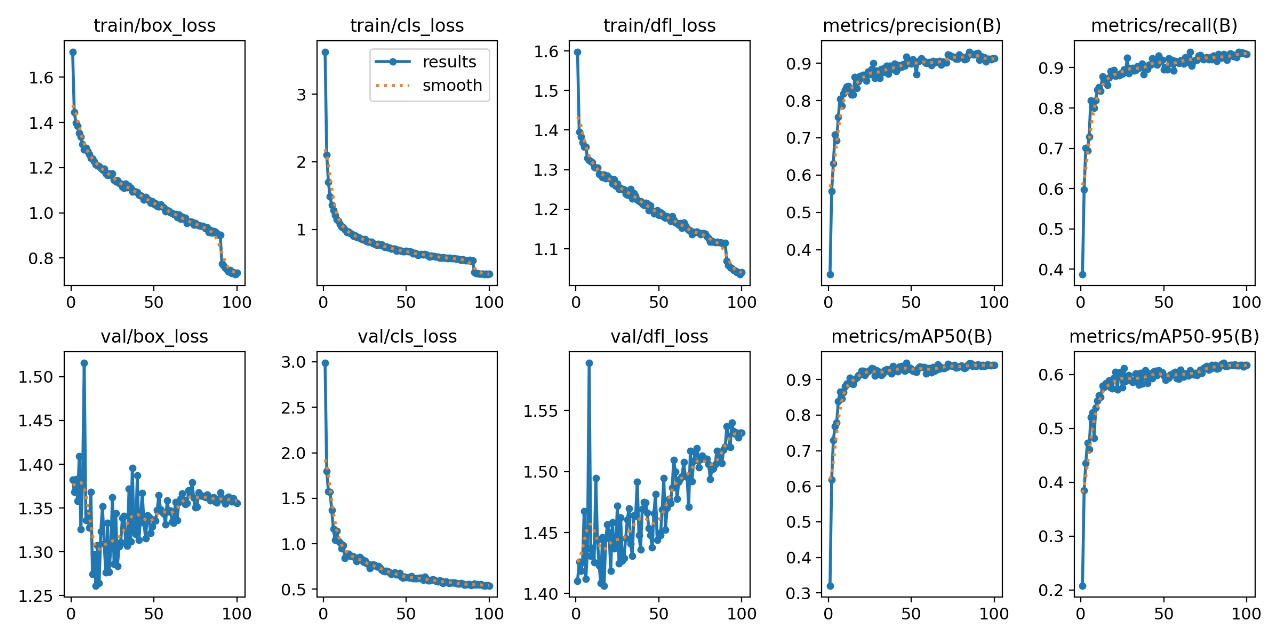

In [2]:
Image("/content/10.jpeg")

# Curvas de pérdida y métricas por época

1. train/box_loss: nos dice el error de predicción de los bounding boxes, podemos observar una disminución progresiva al avanzar las épocas.

2. train/cls_loss: nos dice el error de clasificación durante el entrenamiento, podemos observar una disminución bastante significativa.

3. train/dfl_loss: nos indica la perdida de ubicación de bordes, podemos ver como mejora la predicción de los bordes conforme se entrena el modelo.

4. metrics/precision(B): nos indica la precisión general de nuestro modelo, observamos que alcanza el 0.95, lo que nos indica una buena precisión.

5. metrics/recall(B): nos indica la sencibilidad del modelo, podemos observar que sube a 0.9, ya que detecta la mayoría de los objetos verdaderos.

6. val/box_loss: similar a train/box_loss pero con los datos de validación, podemos observar que oscila pero se mantiene baja, eso nos dice que tiene un buen desempeño general.

7. val/cls_loss: nos indica la pérdida de clasificación al momento de la validación.

8. val/dfl_loss: similar a train/dfl pero con los datos de validación, podemos observar que sube un poco al final lo que nos puede indicar un ligero **overfiting**.

9. metrics/mAP50: precisión media con 50% de loU (intersección sobre unión), alcanza un 0.95, lo que nos undica una excelente detección de objetos.

10. metrics/mAP50~95: un mAP más exigente que el anerior ua que promedia de 50 a 95 de lOU, llega a aproximadamente 0.75, lo que nos indica una buena precisión general.



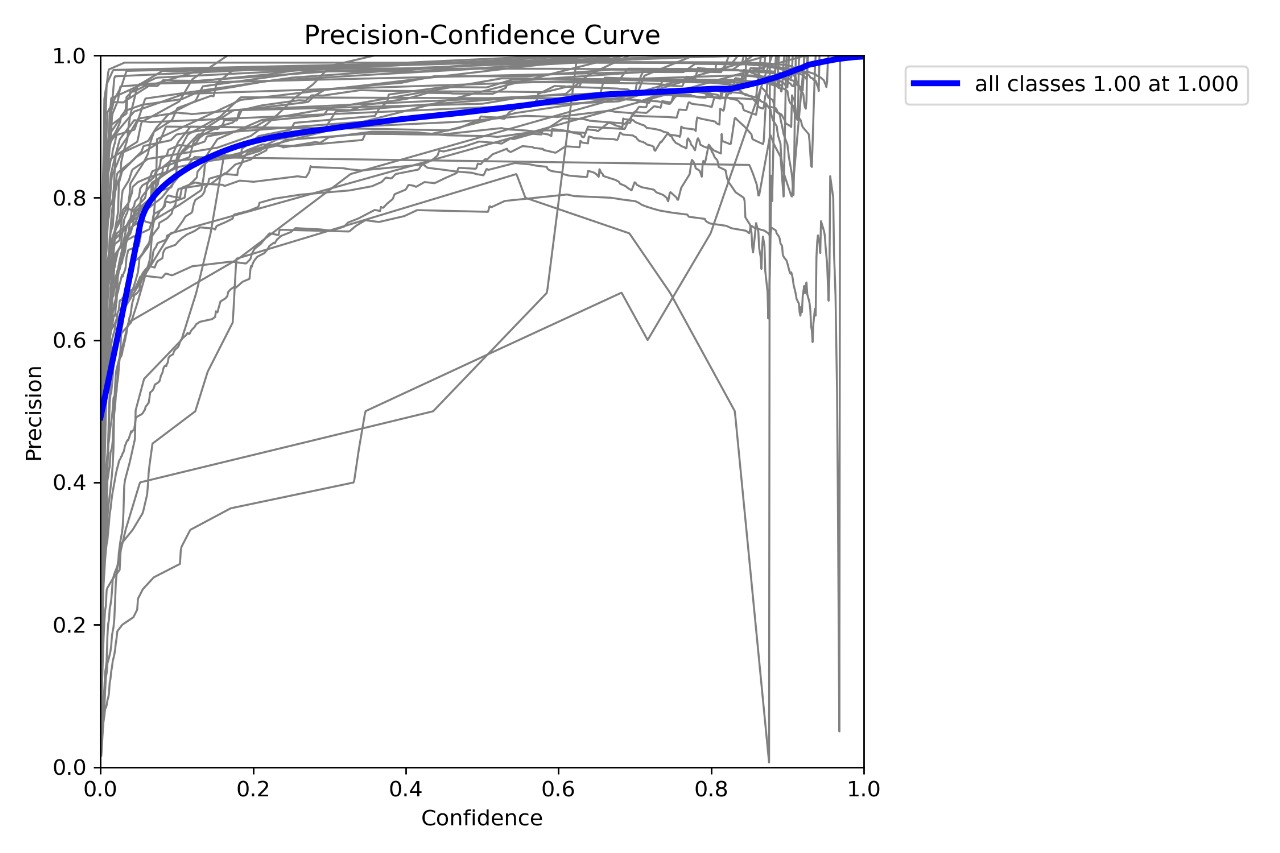

In [3]:
Image("/content/pc.jpeg")

# Precisión vs Confianza
En está gráfica comparamos el eje x que contiene el umbral de confianza, el eje y contiene la precisión.

De está grafica podemos rescatar que a bajas confianzas nuestro modelo tiene menor precisión ~0.6, pero sube rápidamente, a partir de 0.7 de confianza la precisión es muy alta de aproximadamente 0.9.

Esto sugiere que nuestro modelo es muy confiable cuando predice.

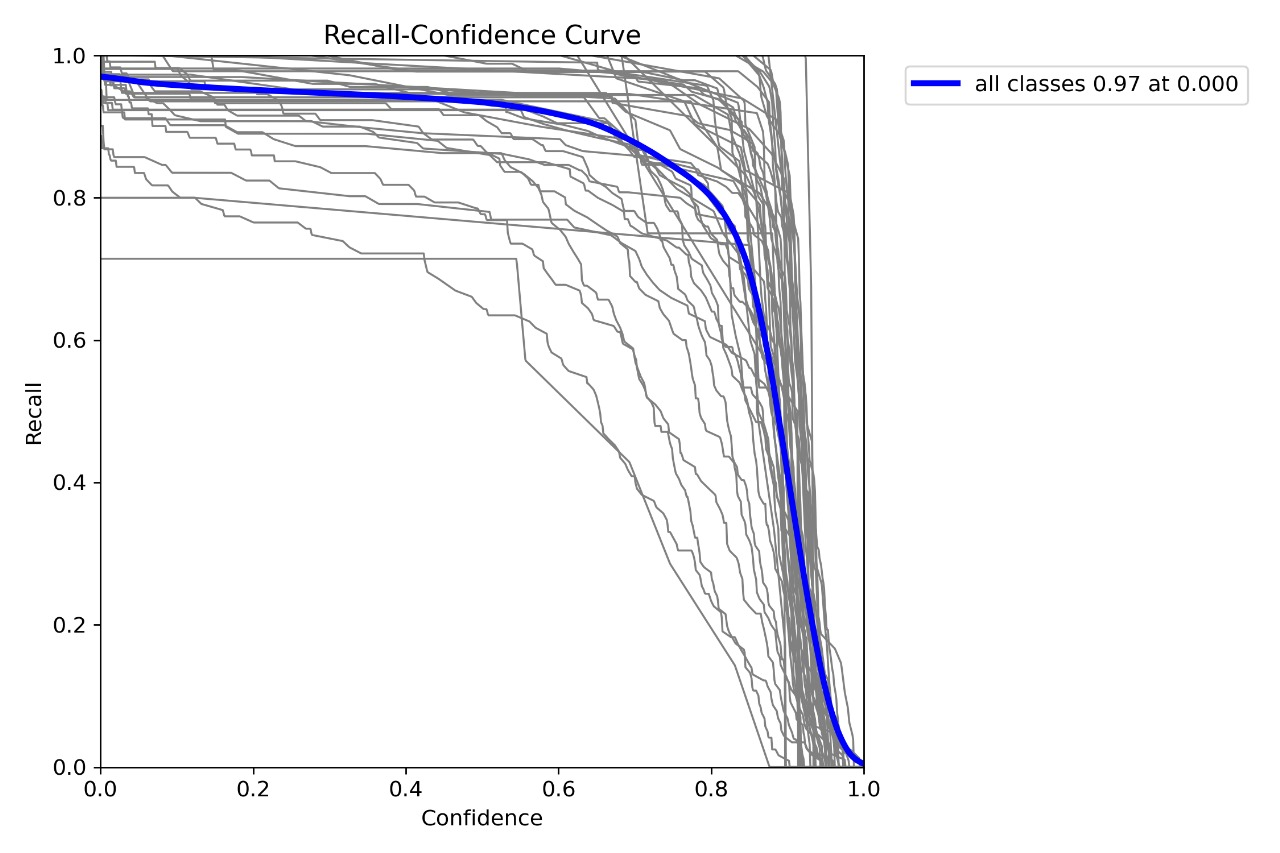

In [4]:
Image("/content/rc.jpeg")

# Recall vs Confianza

El recall puede ser calculado como:

$Recall = \frac{TP}{TP + FN}$

Donde FN, son los falsos negativos y  TP son verdaderos positivos.

Nos indica en all classes que logra detectar el 97% de las clases.

Podems observar que el recall disminuye fuertemente conforme aumenta la confianza, a una confianza >0.8 el recall cae bruscamente a ~0, porque esta descartando muchas predicciones potencialmente correctas.

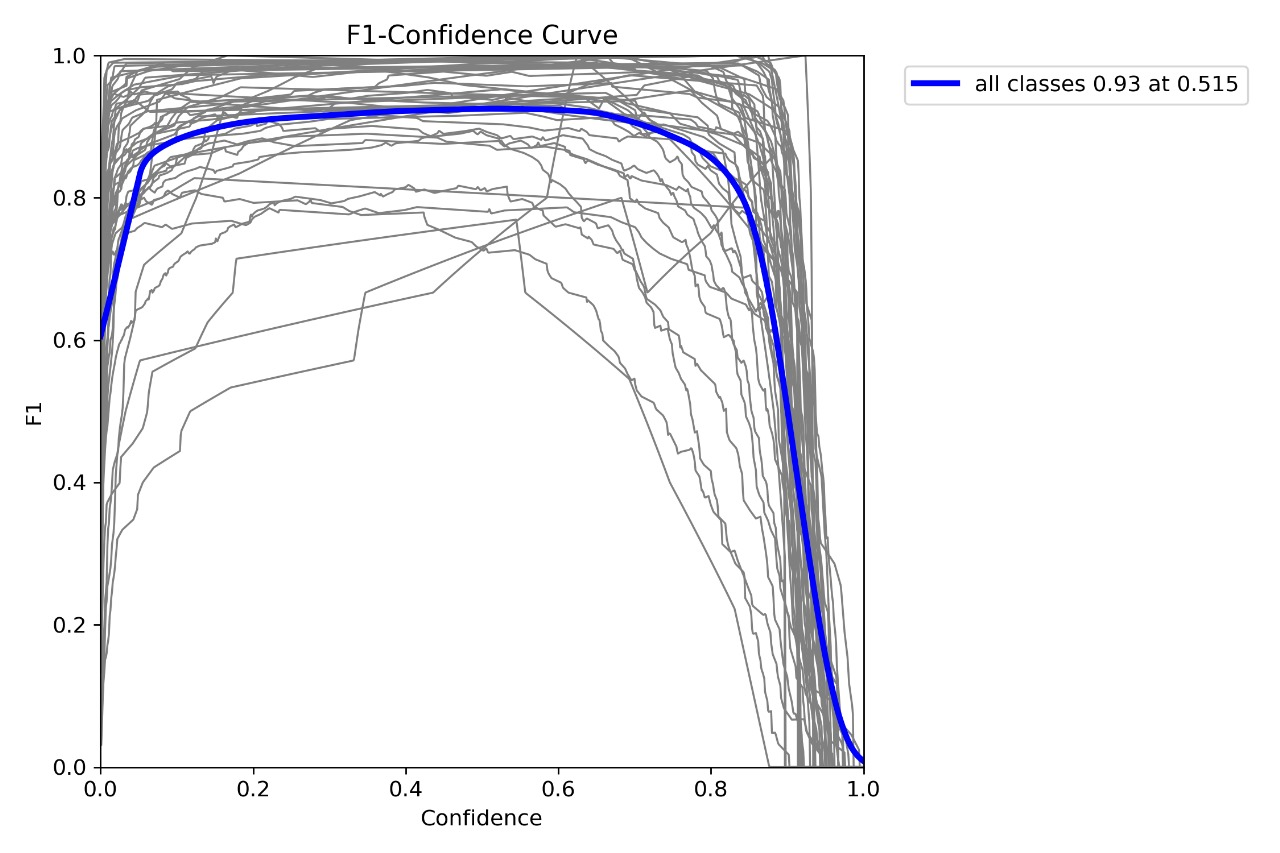

In [5]:
Image("/content/f1.jpeg")

# F1 vs Confianza

F1-score es la media amónica de precisión y recall.

$F1 = 2 * \frac{Precisión * Recall}{Precisión + Recall}$


Podemos ver en all classes 0.93 at 0.515 que nos indica que el mejor compromiso entre precisión u recall ocurre cuando un umbral de confianza de 0.515, alcanza un F1 de 0.93.

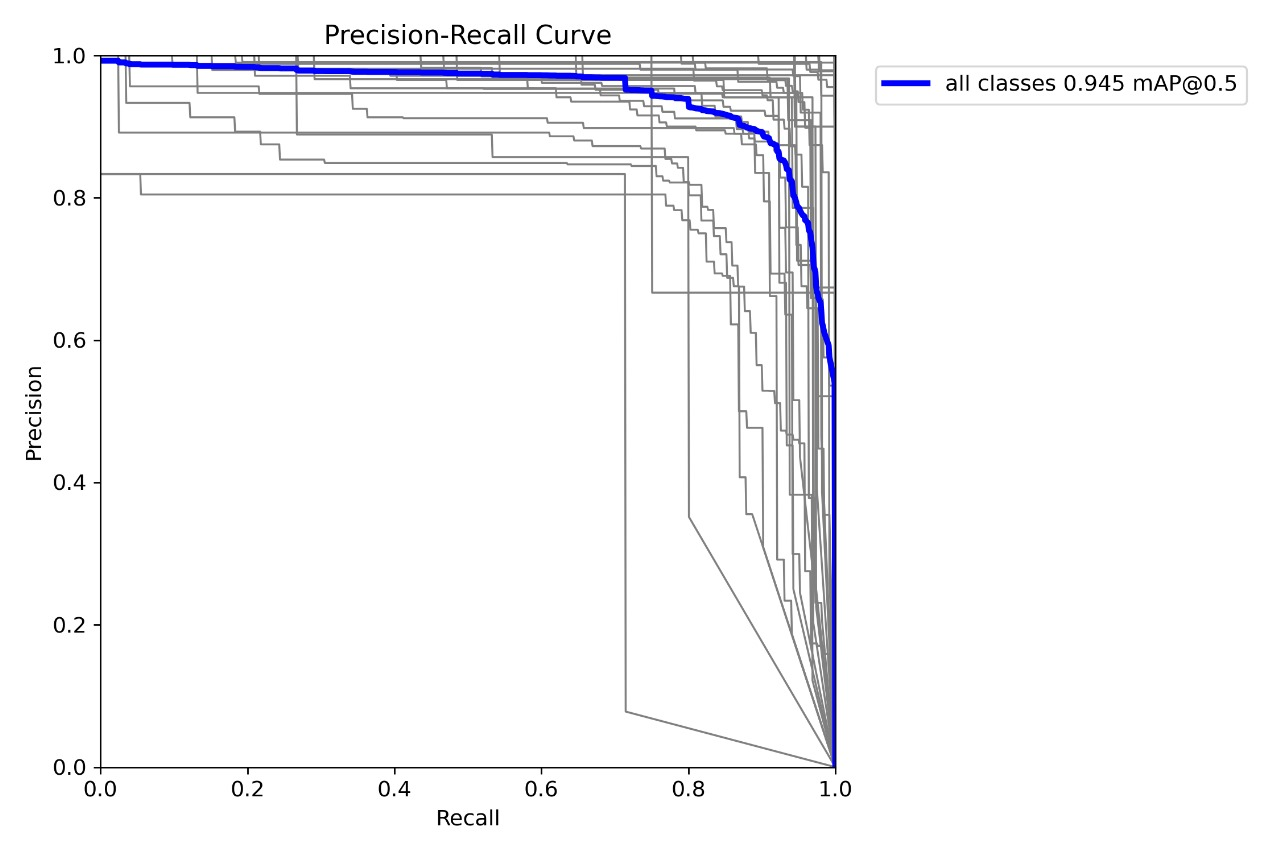

In [6]:
Image("/content/pr.jpeg")

# Precisión vs Recall

Es una de las gráficas más importantes para evaluar en un modelo de detección.
Nos muestra la relación entre la precisión y el recall del modelo para diferentes umbrales de confiaza.

De está gráfica podemos restacatar que nuestro modelo tiene una alta precisión y un buen recall para la mayoria de clases.